In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [11]:
arquivos = [
    './2014.csv',
    './2015.csv',
    './2016.csv',
    './2017.csv',
    './2018.csv',
    './2019.csv',
    './2020.csv',
    './2021.csv',
    './2022.csv',
    './2023.csv',
    './2024.csv'
]

novos_nomes = ['regiao', 'codigo_uf', 'uf', 'codigo_ibge', 'municipio', 
               'qtd_magreza_acentuada', 'perc_magreza_acentuada',
               'qtd_magreza', 'perc_magreza',
               'qtd_eutrofia', 'perc_eutrofia',
               'qtd_sobrepeso', 'perc_sobrepeso',
               'qtd_obesidade', 'perc_obesidade',
               'qtd_obesidade_grave', 'perc_obesidade_grave', 'total']

In [12]:
relatorios = {}
df_list = []
for i, arquivo in enumerate(arquivos):
    ano = arquivo.split('/')[-1].split('.')[0]  
    df = pd.read_csv(arquivo, skiprows=3, sep=";", names=novos_nomes)
    df = df.dropna(how='all')
    df['ano'] = ano 
    relatorios[arquivo] = df
    df_list.append(df)
df_unido = pd.concat(df_list, ignore_index=True)


In [13]:


colunas_para_converter = ['perc_magreza_acentuada', 'perc_magreza', 'perc_eutrofia', 'perc_sobrepeso', 'perc_obesidade', 'perc_obesidade_grave'] 

for coluna in colunas_para_converter:
    df_unido[coluna] = df_unido[coluna].str.replace('%', '', regex=False) 
    df_unido[coluna] = pd.to_numeric(df_unido[coluna], errors='coerce') 
    df_unido[coluna] = df_unido[coluna] / 100 


df_regioes = df_unido[df_unido['regiao'].str.startswith(( 'TOTAL BRASIL', 'TOTAL REGIÃO '), na=False)]
df_regioes['perc_total_obesidade'] = df_regioes['perc_sobrepeso'] + df_regioes['perc_obesidade'] + df_regioes['perc_obesidade_grave']
#df_regioes = df_regioes[['regiao', 'perc_total_obesidade', 'ano']]
df_regioes = df_regioes[['regiao', 'perc_sobrepeso', 'perc_obesidade', 'perc_obesidade_grave', 'perc_total_obesidade', 'ano']]

mapeamento = {
    'TOTAL REGIÃO CENTRO-OESTE': 'Centro-oeste',
    'TOTAL REGIÃO NORDESTE': 'Nordeste',
    'TOTAL REGIÃO NORTE': 'Norte',
    'TOTAL REGIÃO SUDESTE': 'Sudeste',
    'TOTAL REGIÃO SUL': 'Sul',
    'TOTAL BRASIL': 'Total Brasil'
}

df_regioes['regiao'] = df_regioes['regiao'].replace(mapeamento)

In [14]:
df_regioes

,regiao,perc_sobrepeso,perc_obesidade,perc_obesidade_grave,perc_total_obesidade,ano
472,Centro-oeste,0.1786,0.0630,0.0130,0.2546,2014
2276,Nordeste,0.1555,0.0452,0.0097,0.2104,2014
2734,Norte,0.1547,0.0391,0.0071,0.2009,2014
4407,Sudeste,0.1758,0.0674,0.0140,0.2572,2014
5602,Sul,0.2045,0.0837,0.0181,0.3063,2014
...,...,...,...,...,...,...
58316,Nordeste,0.1815,0.0902,0.0226,0.2943,2024
58774,Norte,0.1773,0.0766,0.0159,0.2698,2024
60447,Sudeste,0.1909,0.1149,0.0355,0.3413,2024
61642,Sul,0.2047,0.1258,0.0409,0.3714,2024


In [15]:
df_unido.to_csv("analise_geral.csv")

In [16]:
df_regioes.to_clipboard(decimal=",")
df_regioes['perc_total_obesidade'] = df_regioes['perc_total_obesidade']*100

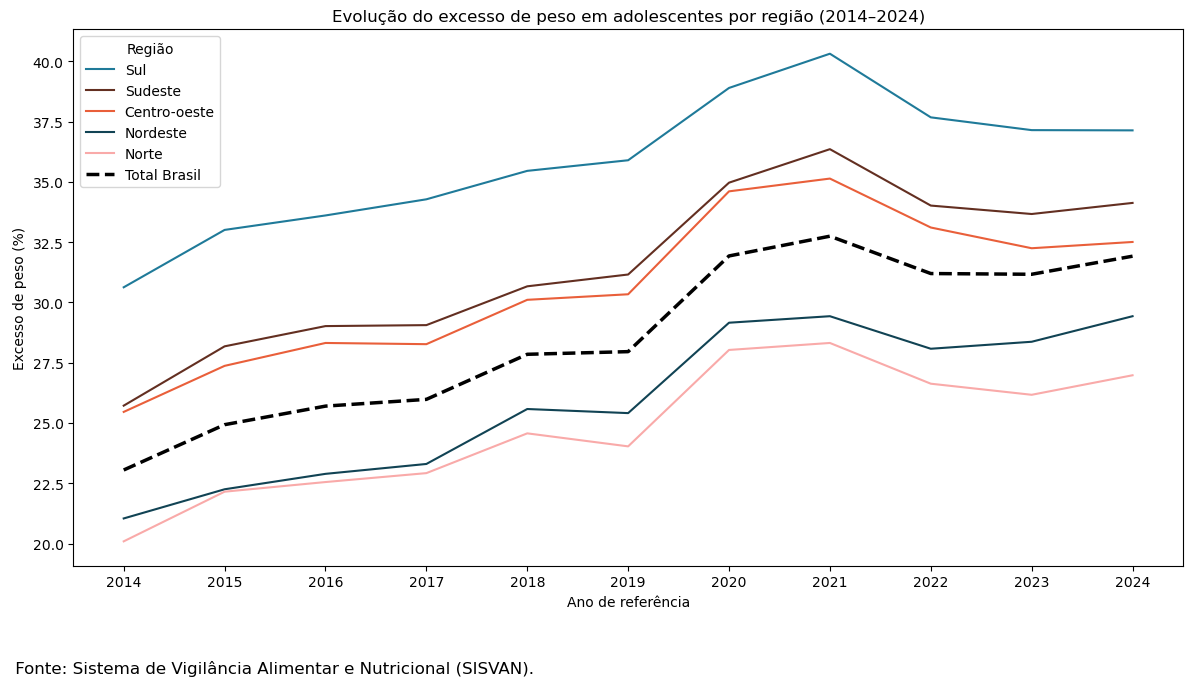

In [8]:
df_regioes['perc_total_obesidade']  = df_regioes['perc_total_obesidade']
df_finais = df_regioes[df_regioes['ano'] == df_regioes['ano'].max()]
ordem_regioes = df_finais.sort_values('perc_total_obesidade', ascending=False)['regiao'].tolist()

cat_colors = ["#1F7A99", "#632F21", "#E95F3A", "#114354", "#F9AAA9"]
sns.set_palette(cat_colors)

plt.figure(figsize=(12, 7))  

for regiao in ordem_regioes:
    if regiao != "Total Brasil":
        data = df_regioes[df_regioes['regiao'] == regiao]
        sns.lineplot(data=data, x='ano', y='perc_total_obesidade', label=regiao, linewidth=1.5)

if "Total Brasil" in df_regioes['regiao'].values:
    data_total = df_regioes[df_regioes['regiao'] == "Total Brasil"]
    sns.lineplot(data=data_total, x='ano', y='perc_total_obesidade', label="Total Brasil",
                 linewidth=2.5, linestyle='--', color='black')

plt.title('Evolução do excesso de peso em adolescentes por região (2014–2024)')
plt.xlabel('Ano de referência')
plt.ylabel('Excesso de peso (%)')
plt.legend(title='Região')
plt.figtext(0.01, -0.02, " Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  
plt.show()
